First 5 rows of the dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4      

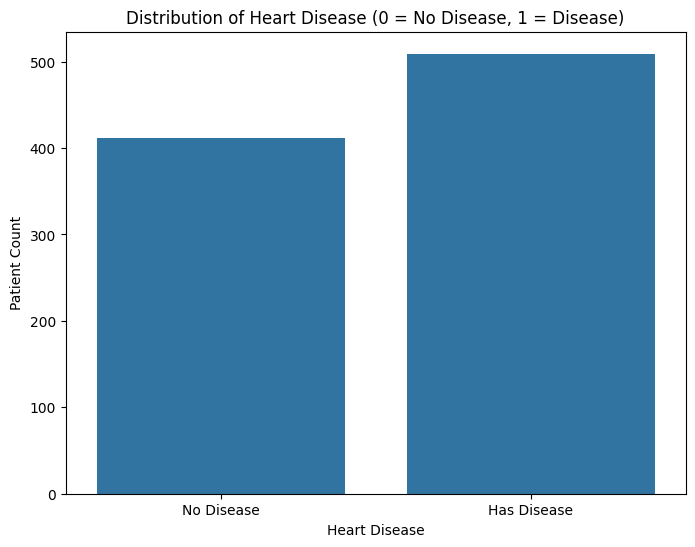

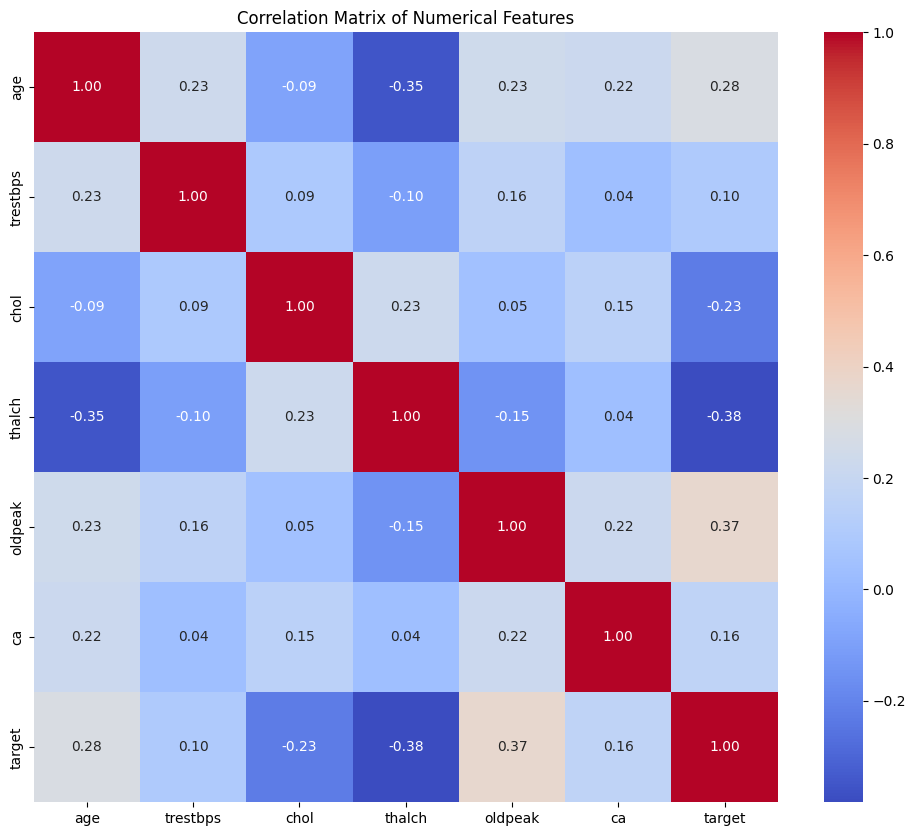


Categorical features converted to numerical format.
Training set shape: (736, 18)
Testing set shape: (184, 18)
Model Accuracy: 84.24%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        82
           1       0.84      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



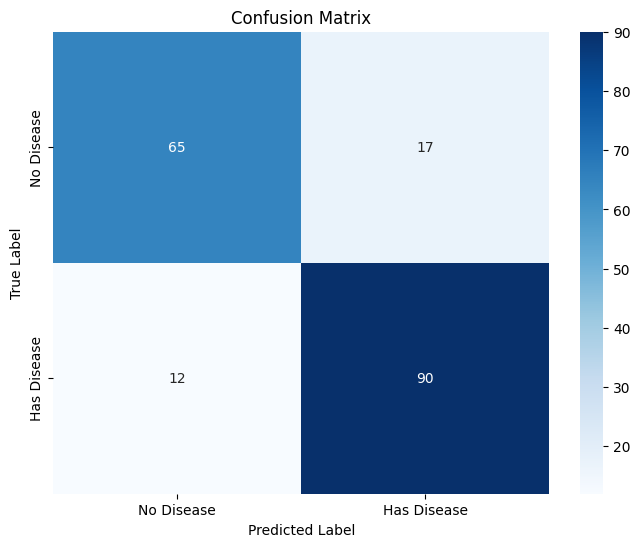

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

warnings.filterwarnings('ignore')

csvFileName = 'heart_disease_uci.csv'

try:
    df = pd.read_csv(csvFileName)
except FileNotFoundError:
    print(f"Error: '{csvFileName}' not found.")
    exit()

print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing values in each column (before cleaning):")
print(df.isnull().sum())

df = df.drop(['id', 'dataset'], axis=1)

df['target'] = (df['num'] > 0).astype(int)
df = df.drop('num', axis=1)

categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=np.number).drop('target', axis=1).columns

for col in numerical_features:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

for col in categorical_features:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

print(f"Total missing values after cleaning: {df.isnull().sum().sum()}") # Should be 0

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease (0 = No Disease, 1 = Disease)')
plt.xlabel('Heart Disease')
plt.ylabel('Patient Count')
plt.xticks([0, 1], ['No Disease', 'Has Disease'])
plt.show()

plt.figure(figsize=(12, 10))
correlation_df = df[list(numerical_features) + ['target']]
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print("\nCategorical features converted to numerical format.")

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Has Disease'], yticklabels=['No Disease', 'Has Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()